# FLAT (NONUNIFORM SENSITIVITY)

#### ALL PIXELS IN THE DETECTOR DON'T ABSORB PHOTONS EQUALLY, SOME OF THEM LESS SENSITIVE OR DOESN'T DETECT AT ALL. IT APPEARS AS FAINT DOUNATS, THEY MIGHT BE DUST OR FROM THE COVERING GLASS. CHECK THE IMAGE BELOW.
NOTE: BLACK CORNERS ARE DUE TO THE FILTER SHAPE IN FRONT OF THE CAMERA, NOT A DEFECT.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
path_flat = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/FLAT"
path_bias = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/BIAS"

In [2]:
with fits.open(path_bias +"/master_bias.fits") as master_bias:
    master_bias = master_bias[0].data

file_flat = sorted(glob.glob(path_flat +"/2025-10-02_09*.fits"))

# This code is dangerous for large data sets. Use with caution.
data_flat = np.array([fits.getdata(f) for f in file_flat])  # The data here are reported in ADUs (Analog to digital unit)
corrected_flat = data_flat - master_bias                    # Removing the bias error from the flat
master_flat_raw = np.median(corrected_flat , axis=0)        # This line take the median from the 3D array and transform it into 2D array
master_flat = master_flat_raw / np.mean(master_flat_raw)    # Normalized flat, which can affect only relative varitions and doesn't affect the galaxy image
# print( "The flat matrix shape = ", np.shape(master_flat))

# Create a PrimaryHDU object from the master_flat data (Create a FITS file)
# hdu_flat = fits.PrimaryHDU(master_flat)
# hdu_list_flat = fits.HDUList([hdu_flat])
# hdu_list_flat.writeto(path_flat + "/master_flat.fits", overwrite=True)

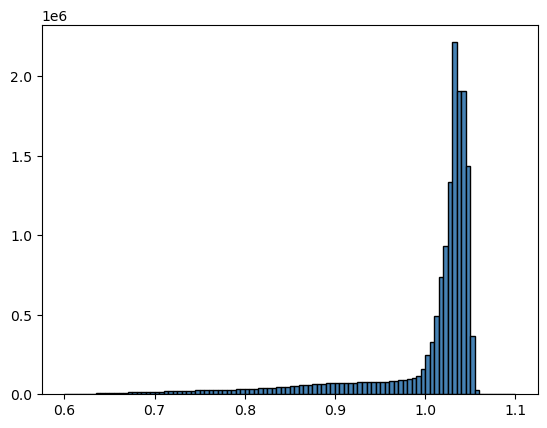

In [5]:
plt.hist(master_flat.flatten(), bins= 100, color= 'steelblue', edgecolor='black', range=(0.6,1.1))
plt.show()

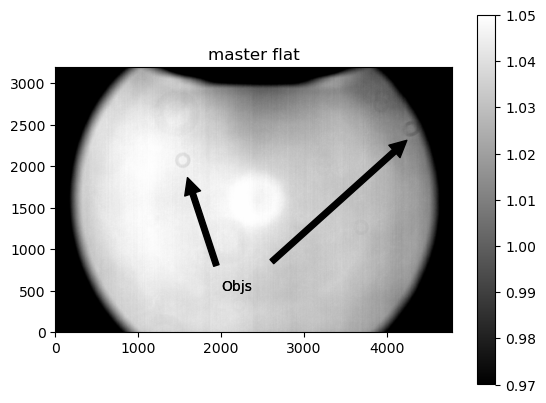

In [10]:
# The plot code
plt.imshow(master_flat,cmap='gray', clim= (0.97,1.05), origin= 'lower')
plt.colorbar()
plt.annotate('Objs', xy=(1550, 2000), xytext=(2000, 500),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.annotate('Objs', xy=(4450, 2500), xytext=(2000, 500),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.title('master flat')
plt.show()

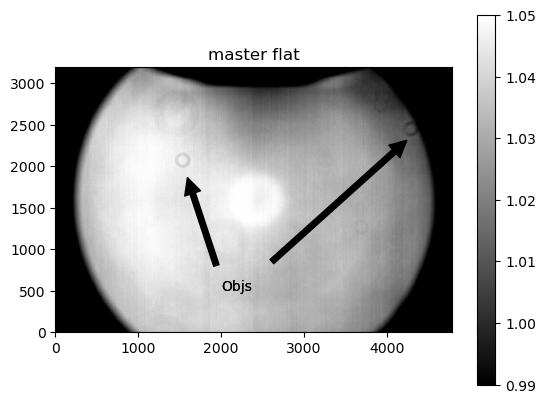

In [11]:
plt.imshow(master_flat,cmap='gray', clim= (0.99,1.05), origin= 'lower')
plt.colorbar()
plt.annotate('Objs', xy=(1550, 2000), xytext=(2000, 500),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.annotate('Objs', xy=(4450, 2500), xytext=(2000, 500),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.title('master flat')
plt.show()